## Compare snow depth / SWE variable in JRA%% and ERA5 over Alaska  

In [ ]:
import pandas as pd
import xarray as xr
import rioxarray
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib import pyplot as plt
from pathlib import Path

In [ ]:
datadir = Path("/Volumes/CWMobileSSD/Climate/JRA55/snow")
JRA55_clim= datadir / "jra55_snwe_clim_1966_1985"
datadir = Path("/Volumes/CWMobileSSD/Climate/ERA5/sd_grib")
january_ERA5 = datadir / "e5.oper.an.sfc.128_141_sd.ll025sc.2021010100_2021013123.grb"
february_ERA5 = datadir / "e5.oper.an.sfc.128_141_sd.ll025sc.2021020100_2021022823.grb"
april_ERA5 = datadir / "e5.oper.an.sfc.128_141_sd.ll025sc.2021040100_2021043023.grb"
june_ERA5 = datadir / "e5.oper.an.sfc.128_141_sd.ll025sc.2021060100_2021063023.grb"

In [ ]:
ds_JRA = xr.open_dataset(JRA55_clim, engine="cfgrib")
ds_JRA

<xarray.Dataset>
Dimensions:     (time: 366, latitude: 320, longitude: 640)
Coordinates:
  * time        (time) datetime64[ns] 1984-02-29T18:00:00 ... 1985-12-31T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.57 89.01 88.45 ... -88.45 -89.01 -89.57
  * longitude   (longitude) float64 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
    valid_time  (time) datetime64[ns] ...
Data variables:
    sd          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             rjtd
    GRIB_centreDescription:  Japanese Meteorological Agency - Tokyo
    GRIB_subCentre:          241
    Conventions:             CF-1.7
    institution:             Japanese Meteorological Agency - Tokyo
    history:                 2024-09-17T23:43 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
ds_JRA.time

<xarray.DataArray 'time' (time: 366)>
array(['1984-02-29T18:00:00.000000000', '1985-01-01T18:00:00.000000000',
       '1985-01-02T18:00:00.000000000', ..., '1985-12-29T18:00:00.000000000',
       '1985-12-30T18:00:00.000000000', '1985-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time        (time) datetime64[ns] 1984-02-29T18:00:00 ... 1985-12-31T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
    valid_time  (time) datetime64[ns] ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [ ]:
ds = xr.open_dataset(january_ERA5)
ds

<xarray.Dataset>
Dimensions:     (time: 744, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2021-01-01 ... 2021-01-31T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    sd          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-09-17T23:43 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
ds.time.dt.year[0]

<xarray.DataArray 'year' ()>
array(2021)
Coordinates:
    number      int64 ...
    time        datetime64[ns] 2021-01-01
    step        timedelta64[ns] ...
    surface     float64 ...
    valid_time  datetime64[ns] ...

In [ ]:
cmap = plt.get_cmap('RdPu', 7)
mydataarray = ds_JRA.sd.isel(time=1)

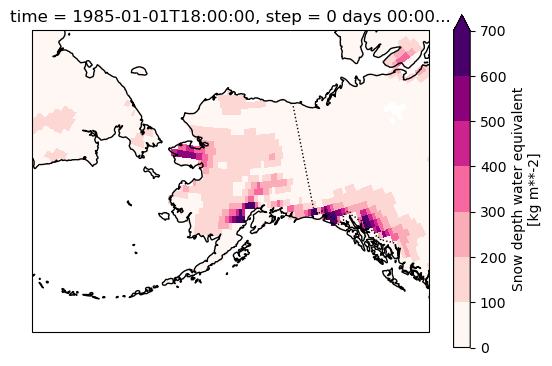

In [ ]:
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)
ax.set_extent([-180, -130, 48, 75])

mydataarray.plot(
    cmap=cmap, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=700
)

# add additional features and corrections
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')

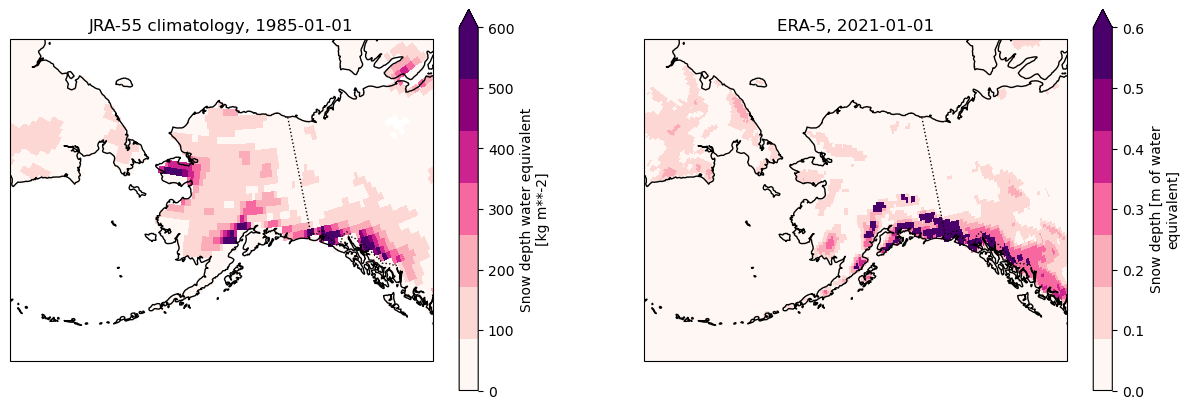

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': projection},
                        figsize=(15,5.5))
for ax in axs.flatten():
    ax.set_extent([-180, -130, 48, 75])
    ax.coastlines()
    ax.add_feature(cf.BORDERS, linestyle=':')
with xr.open_dataset(JRA55_clim, engine="cfgrib") as ds:
    ds.sd.isel(time=1).plot(
        cmap=cmap, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[0],
        vmax=600
    )
    axs[0].set_title(f"JRA-55 climatology, {ds.time[1].dt.strftime('%Y-%m-%d').data}")

with xr.open_dataset(january_ERA5, engine="cfgrib") as ds:
    ds.sd.isel(time=0).plot(
        cmap=cmap, cbar_kwargs={"shrink": 0.9},
        transform=ccrs.PlateCarree(),
        ax=axs[1],
        vmax=0.6
    )
    axs[1].set_title(f"ERA-5, {ds.time[0].dt.strftime('%Y-%m-%d').data}")


In [ ]:
ds_JRA.isel(time=slice(1, None))

<xarray.Dataset>
Dimensions:     (time: 365, latitude: 320, longitude: 640)
Coordinates:
  * time        (time) datetime64[ns] 1985-01-01T18:00:00 ... 1985-12-31T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.57 89.01 88.45 ... -88.45 -89.01 -89.57
  * longitude   (longitude) float64 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
    valid_time  (time) datetime64[ns] ...
Data variables:
    sd          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             rjtd
    GRIB_centreDescription:  Japanese Meteorological Agency - Tokyo
    GRIB_subCentre:          241
    Conventions:             CF-1.7
    institution:             Japanese Meteorological Agency - Tokyo
    history:                 2024-09-17T23:43 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
ds = xr.open_dataset(february_ERA5)
ds

<xarray.Dataset>
Dimensions:     (time: 672, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2021-02-01 ... 2021-02-28T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    sd          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-09-17T23:44 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
ds.time

<xarray.DataArray 'time' (time: 672)>
array(['2021-02-01T00:00:00.000000000', '2021-02-01T01:00:00.000000000',
       '2021-02-01T02:00:00.000000000', ..., '2021-02-28T21:00:00.000000000',
       '2021-02-28T22:00:00.000000000', '2021-02-28T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2021-02-01 ... 2021-02-28T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
    valid_time  (time) datetime64[ns] ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [ ]:
start_Julian = ds.isel(time=0).time.dt.strftime('%j').astype(int).item()
numdays = len(ds.time) // 24
slice_JRA = ds_JRA.isel(time=slice(start_Julian, start_Julian+numdays))
slice_JRA.time

<xarray.DataArray 'time' (time: 28)>
array(['1985-02-01T18:00:00.000000000', '1985-02-02T18:00:00.000000000',
       '1985-02-03T18:00:00.000000000', '1985-02-04T18:00:00.000000000',
       '1985-02-05T18:00:00.000000000', '1985-02-06T18:00:00.000000000',
       '1985-02-07T18:00:00.000000000', '1985-02-08T18:00:00.000000000',
       '1985-02-09T18:00:00.000000000', '1985-02-10T18:00:00.000000000',
       '1985-02-11T18:00:00.000000000', '1985-02-12T18:00:00.000000000',
       '1985-02-13T18:00:00.000000000', '1985-02-14T18:00:00.000000000',
       '1985-02-15T18:00:00.000000000', '1985-02-16T18:00:00.000000000',
       '1985-02-17T18:00:00.000000000', '1985-02-18T18:00:00.000000000',
       '1985-02-19T18:00:00.000000000', '1985-02-20T18:00:00.000000000',
       '1985-02-21T18:00:00.000000000', '1985-02-22T18:00:00.000000000',
       '1985-02-23T18:00:00.000000000', '1985-02-24T18:00:00.000000000',
       '1985-02-25T18:00:00.000000000', '1985-02-26T18:00:00.000000000',
       '1985-02-27T18:00:00.000000000', '1985-02-28T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time        (time) datetime64[ns] 1985-02-01T18:00:00 ... 1985-02-28T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
    valid_time  (time) datetime64[ns] ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [ ]:
snow_jra = ds_JRA.sd

theyear = ds.isel(time=0).time.dt.year.item()
themonth = ds.isel(time=0).time.dt.month.item()
startdatestr = f'{theyear}-{themonth}-01T00:00:00.000000000'
startdatestr_JRA = f'1985-{themonth}-01T18:00:00.000000000'
JRAclim_slice = snow_jra.sel(time=pd.date_range(startdatestr_JRA, freq='D', periods=numdays))
JRAclim_slice.coords['time'] = pd.date_range(startdatestr, freq='D', periods=numdays)
JRAclim_slice

<xarray.DataArray 'sd' (time: 28, latitude: 320, longitude: 640)>
[5734400 values with dtype=float32]
Coordinates:
  * time        (time) datetime64[ns] 2021-02-01 2021-02-02 ... 2021-02-28
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.57 89.01 88.45 ... -88.45 -89.01 -89.57
  * longitude   (longitude) float64 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
    valid_time  (time) datetime64[ns] ...
Attributes: (12/24)
    GRIB_paramId:                             228141
    GRIB_numberOfPoints:                      204800
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_gg
    ...                                       ...
    GRIB_name:                                Snow depth water equivalent
    GRIB_shortName:                           sd
    GRIB_units:                               kg m**-2
    long_name:                                Snow depth water equivalent
    units:                                    kg m**-2
    standard_name:                            unknown

In [ ]:
ds

<xarray.Dataset>
Dimensions:     (time: 672, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2021-02-01 ... 2021-02-28T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    sd          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-09-17T23:44 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
interpol = JRAclim_slice.fillna(0).interp_like(
            ds, method='linear')
interpol

<xarray.DataArray 'sd' (time: 672, latitude: 721, longitude: 1440)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
                 nan,         nan],
        ...,
        [10.81207321, 10.81207321, 10.81207321, ..., 10.81207321,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
    step       timedelta64[ns] 00:00:00
    surface    float64 0.0
  * time       (time) datetime64[ns] 2021-02-01 ... 2021-02-28T23:00:00
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes: (12/24)
    GRIB_paramId:                             228141
    GRIB_numberOfPoints:                      204800
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_gg
    ...                                       ...
    GRIB_name:                                Snow depth water equivalent
    GRIB_shortName:                           sd
    GRIB_units:                               kg m**-2
    long_name:                                Snow depth water equivalent
    units:                                    kg m**-2
    standard_name:                            unknown

In [ ]:
combined_DS = ds.sd.combine_first(
            interpol / 1000)
combined_DS

<xarray.DataArray 'sd' (time: 672, latitude: 721, longitude: 1440)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.],
        [10., 10., 10., ..., 10., 10., 10.]]])
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2021-02-01 ... 2021-02-28T23:00:00
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Attributes: (12/30)
    GRIB_paramId:                             141
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           sd
    GRIB_totalNumber:                         0
    GRIB_units:                               m of water equivalent
    long_name:                                Snow depth
    units:                                    m of water equivalent
    standard_name:                            lwe_thickness_of_surface_snow_a...

In [ ]:
ds['sd'] = combined_DS

In [ ]:
mydataarray = combined_DS.isel(time=50)

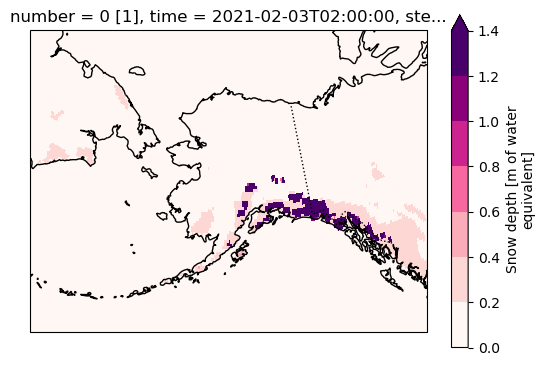

In [ ]:
projection = ccrs.AlbersEqualArea(
    central_longitude=-154.0, central_latitude=50.0, 
    standard_parallels=(55.0, 65.0))
ax = plt.axes(projection=projection)
ax.set_extent([-180, -130, 48, 75])

mydataarray.plot(
    cmap=cmap, cbar_kwargs={"shrink": 0.9},
    transform=ccrs.PlateCarree(),
    ax=ax,
    vmax=1.4
)

# add additional features and corrections
ax.coastlines()
ax.add_feature(cf.BORDERS, linestyle=':')

In [ ]:
mydataarray

<xarray.DataArray 'sd' (latitude: 721, longitude: 1440)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [11.49370939, 11.49370939, 11.49370939, ..., 11.49370939,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
    step       timedelta64[ns] 00:00:00
    surface    float64 0.0
    time       datetime64[ns] 2021-02-03T02:00:00
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes: (12/24)
    GRIB_paramId:                             228141
    GRIB_numberOfPoints:                      204800
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_gg
    ...                                       ...
    GRIB_name:                                Snow depth water equivalent
    GRIB_shortName:                           sd
    GRIB_units:                               kg m**-2
    long_name:                                Snow depth water equivalent
    units:                                    kg m**-2
    standard_name:                            unknown